In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/analiysis-on-parkinsons-disease/parkinsons.csv


Importing the dependencies

In [2]:
# Importing Libraries
import requests
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import warnings

Data Collection & Analysis

In [3]:
# loading the data from csv file to a Pandas DataFrame
parkinsons_data = pd.read_csv('/kaggle/input/analiysis-on-parkinsons-disease/parkinsons.csv')

In [4]:
# printing the first 5 rows of the dataframe
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
# number of rows and columns in the dataframe
parkinsons_data.shape

(195, 24)

In [6]:
# getting more information about the dataset
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [7]:
# checking for missing values in each column
parkinsons_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [8]:
# getting some statistical measures about the data
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [9]:
# distribution of target Variable
parkinsons_data['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

In [10]:
# Select only numeric columns
numeric_data = parkinsons_data.select_dtypes(include=['number'])

# Group by the 'status' column and calculate the mean
grouped_data = numeric_data.groupby(parkinsons_data['status']).mean()

# Display the grouped data
print(grouped_data)

        MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
status                                                            
0        181.937771    223.636750    145.207292        0.003866   
1        145.180762    188.441463    106.893558        0.006989   

        MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
status                                                                   
0               0.000023  0.001925  0.002056    0.005776      0.017615   
1               0.000051  0.003757  0.003900    0.011273      0.033658   

        MDVP:Shimmer(dB)  ...  Shimmer:DDA       NHR        HNR  status  \
status                    ...                                             
0               0.162958  ...     0.028511  0.011483  24.678750     0.0   
1               0.321204  ...     0.053027  0.029211  20.974048     1.0   

            RPDE       DFA   spread1   spread2        D2       PPE  
status                                                          

<Axes: xlabel='status', ylabel='count'>

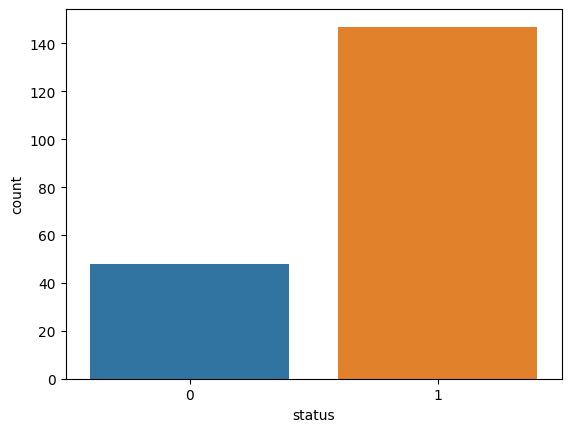

In [11]:
#Balance of Data
sns.countplot(x='status',data=parkinsons_data)

<Axes: >

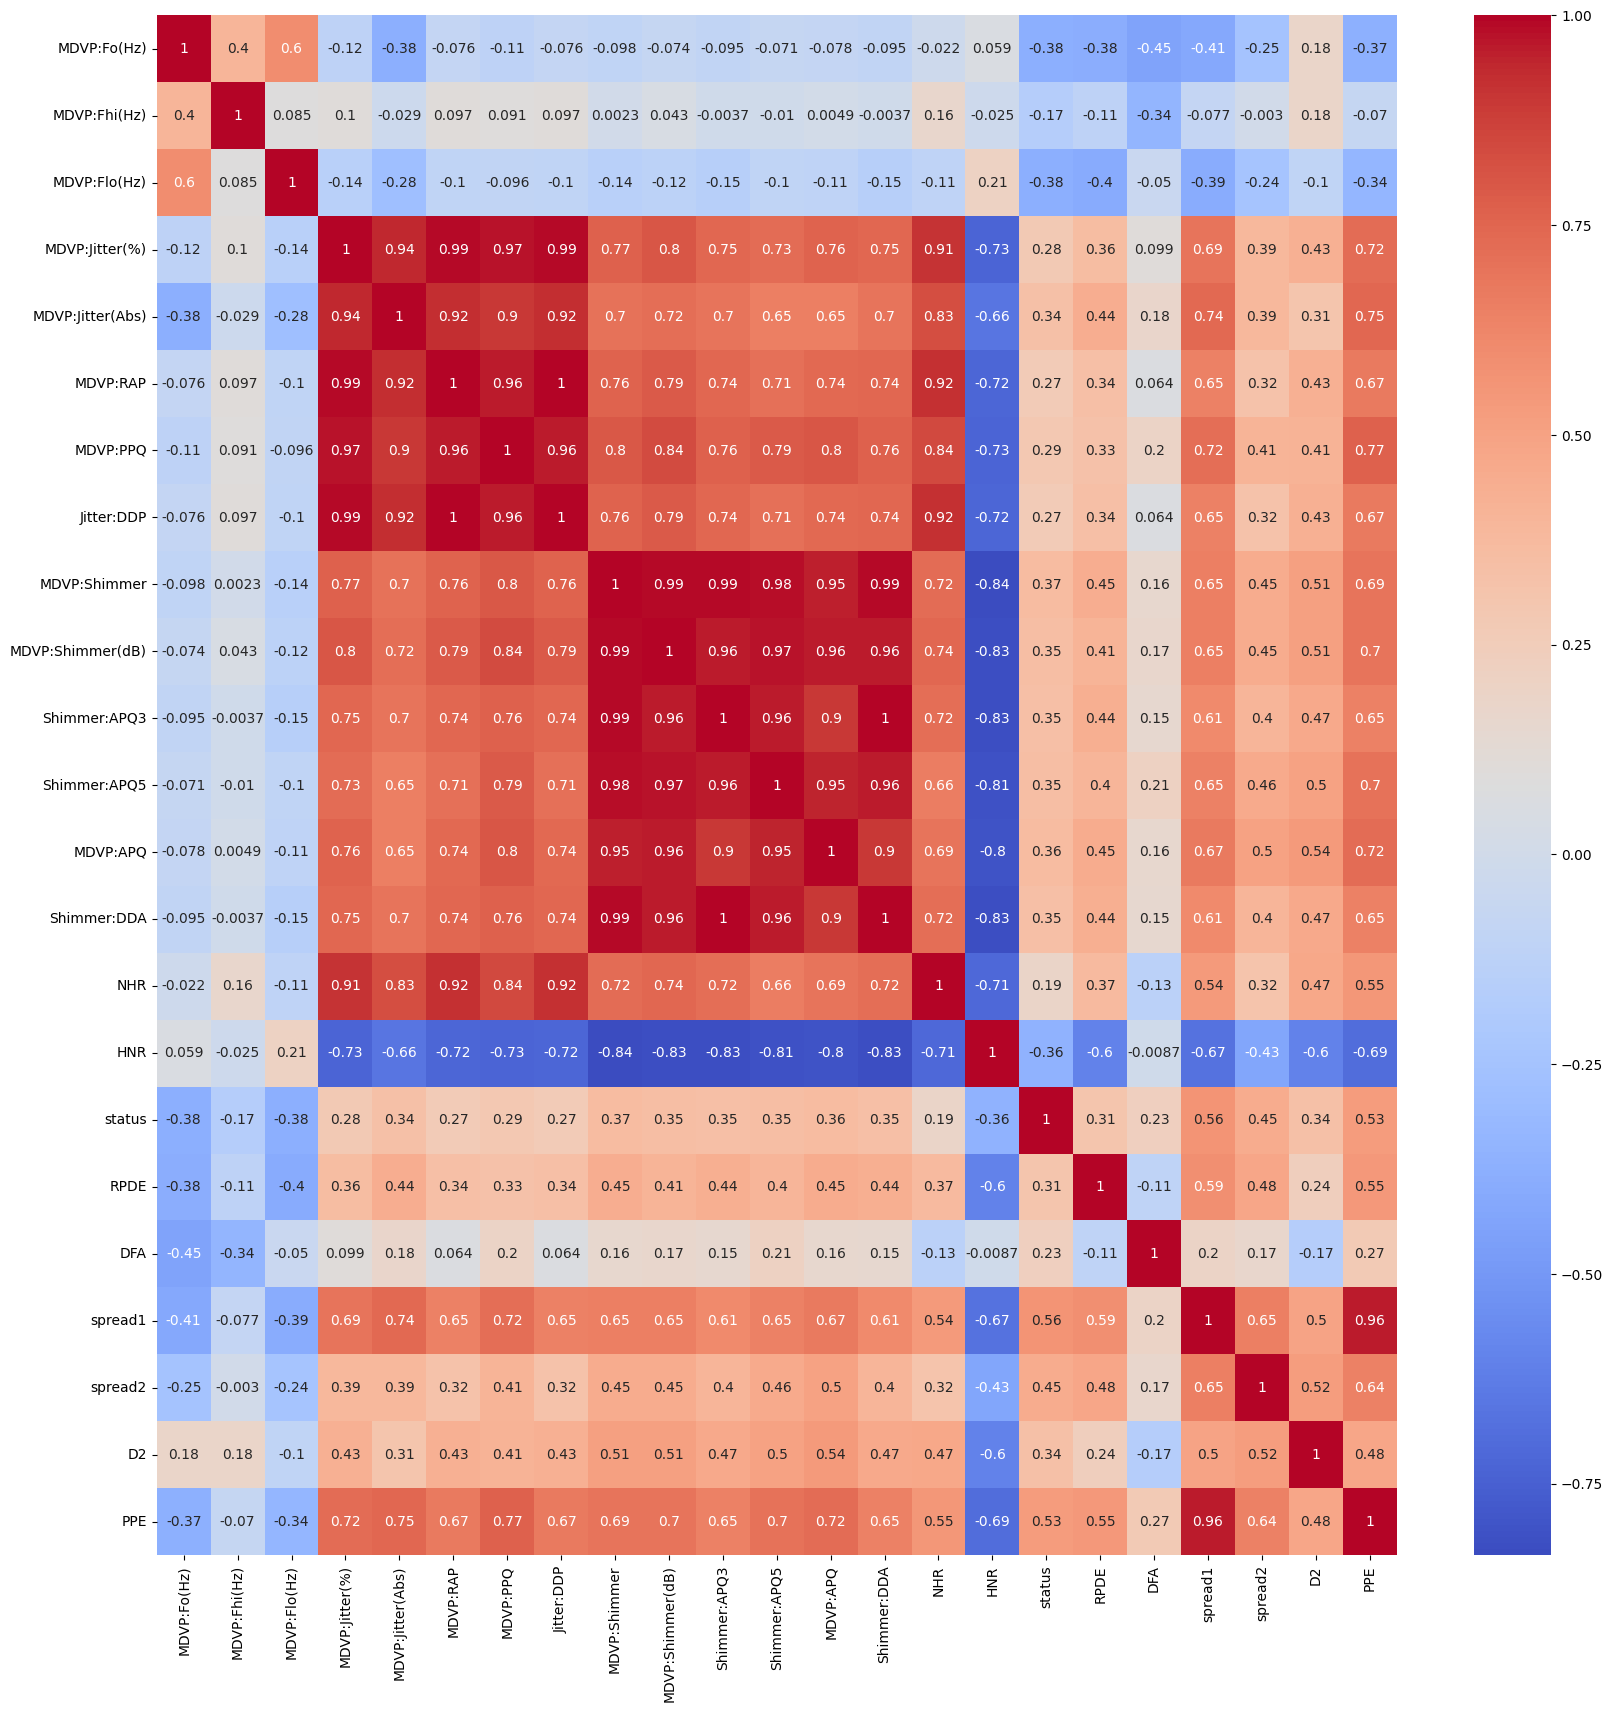

In [12]:
#In this correlation heatmap, we can see that many independent features are highly correlated with eachother.
fig, ax = plt.subplots(figsize=(20, 20))  # Adjust the figure size as needed
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', ax=ax)

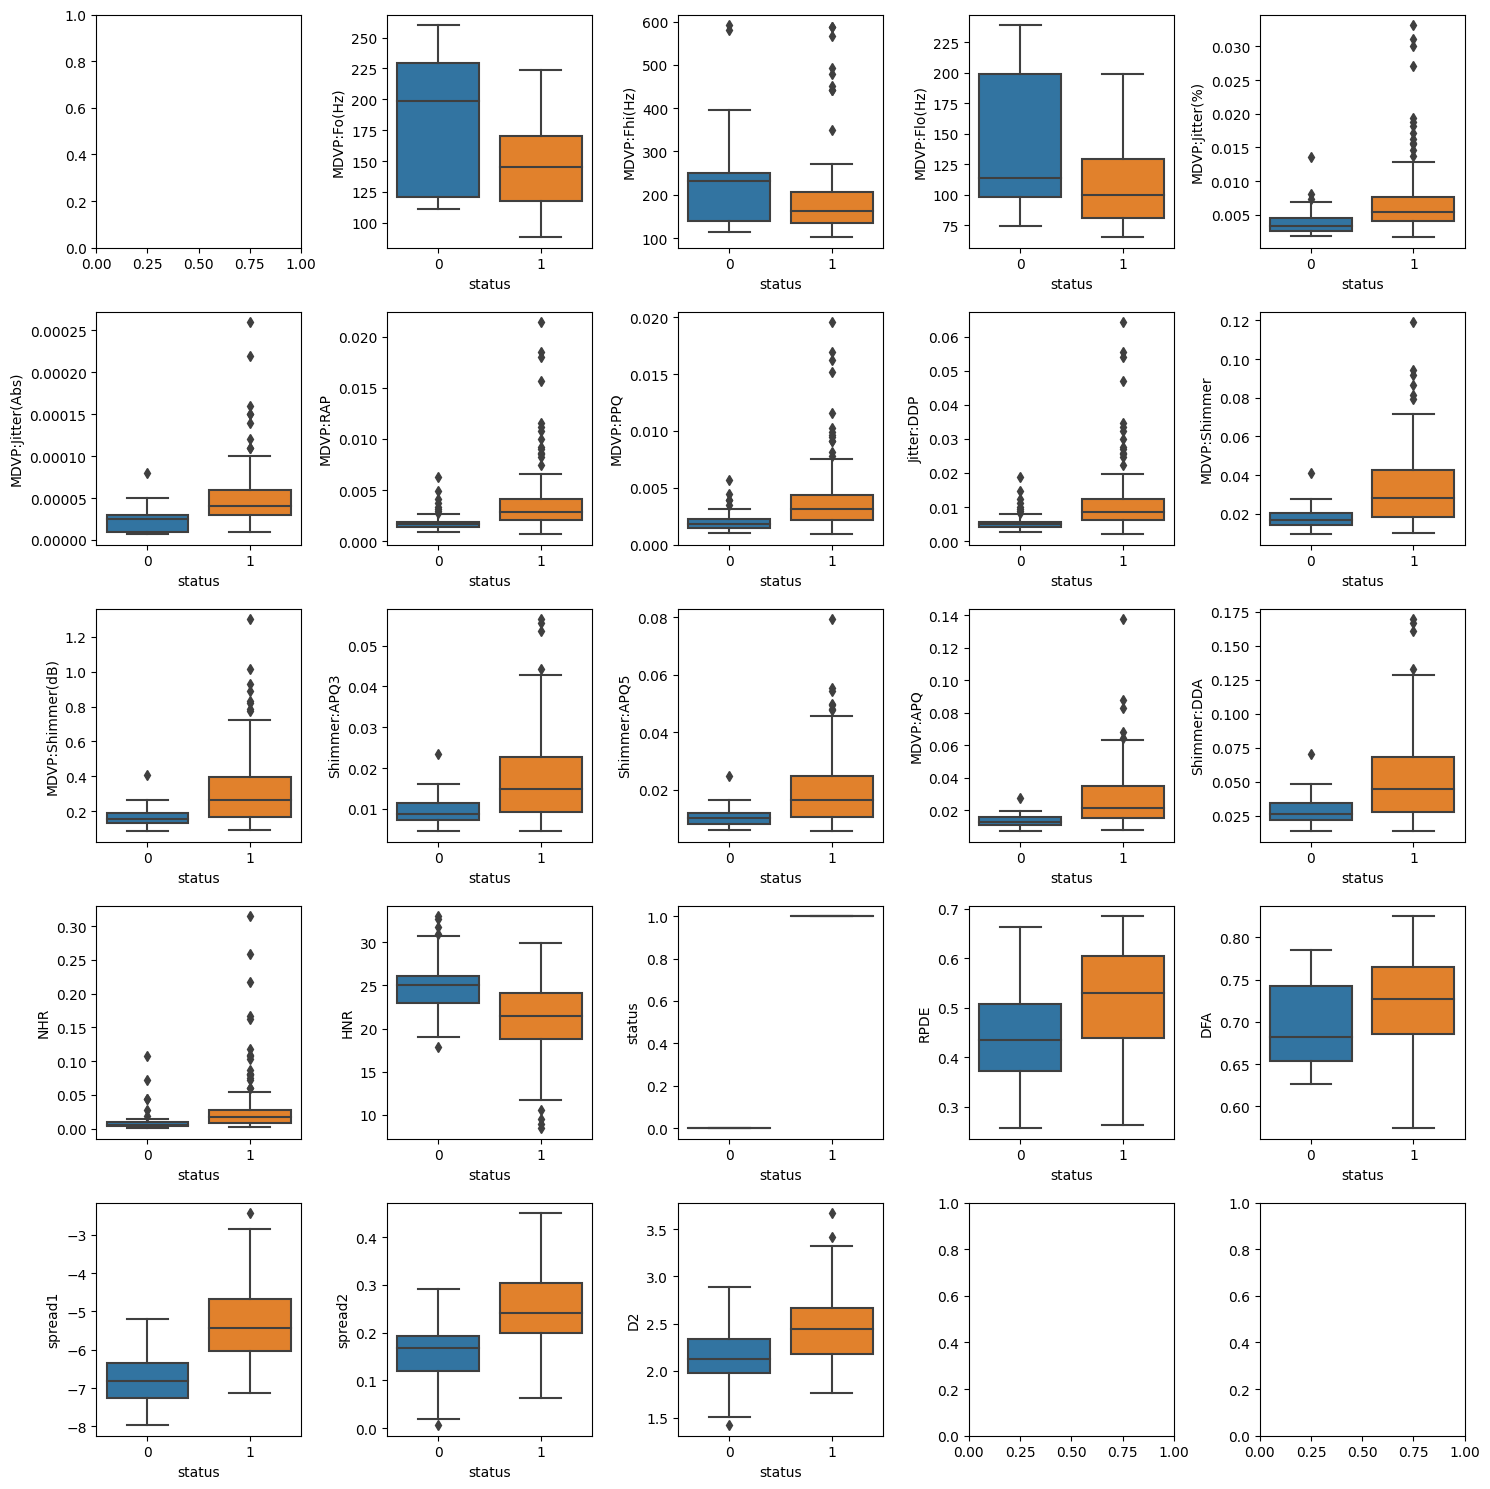

In [13]:
#Box Plot
fig,axes=plt.subplots(5,5,figsize=(15,15))
axes=axes.flatten()

for i in range(1,len(parkinsons_data.columns)-1):
    sns.boxplot(x='status',y=parkinsons_data.iloc[:,i],data=parkinsons_data,orient='v',ax=axes[i])
plt.tight_layout()
plt.show()

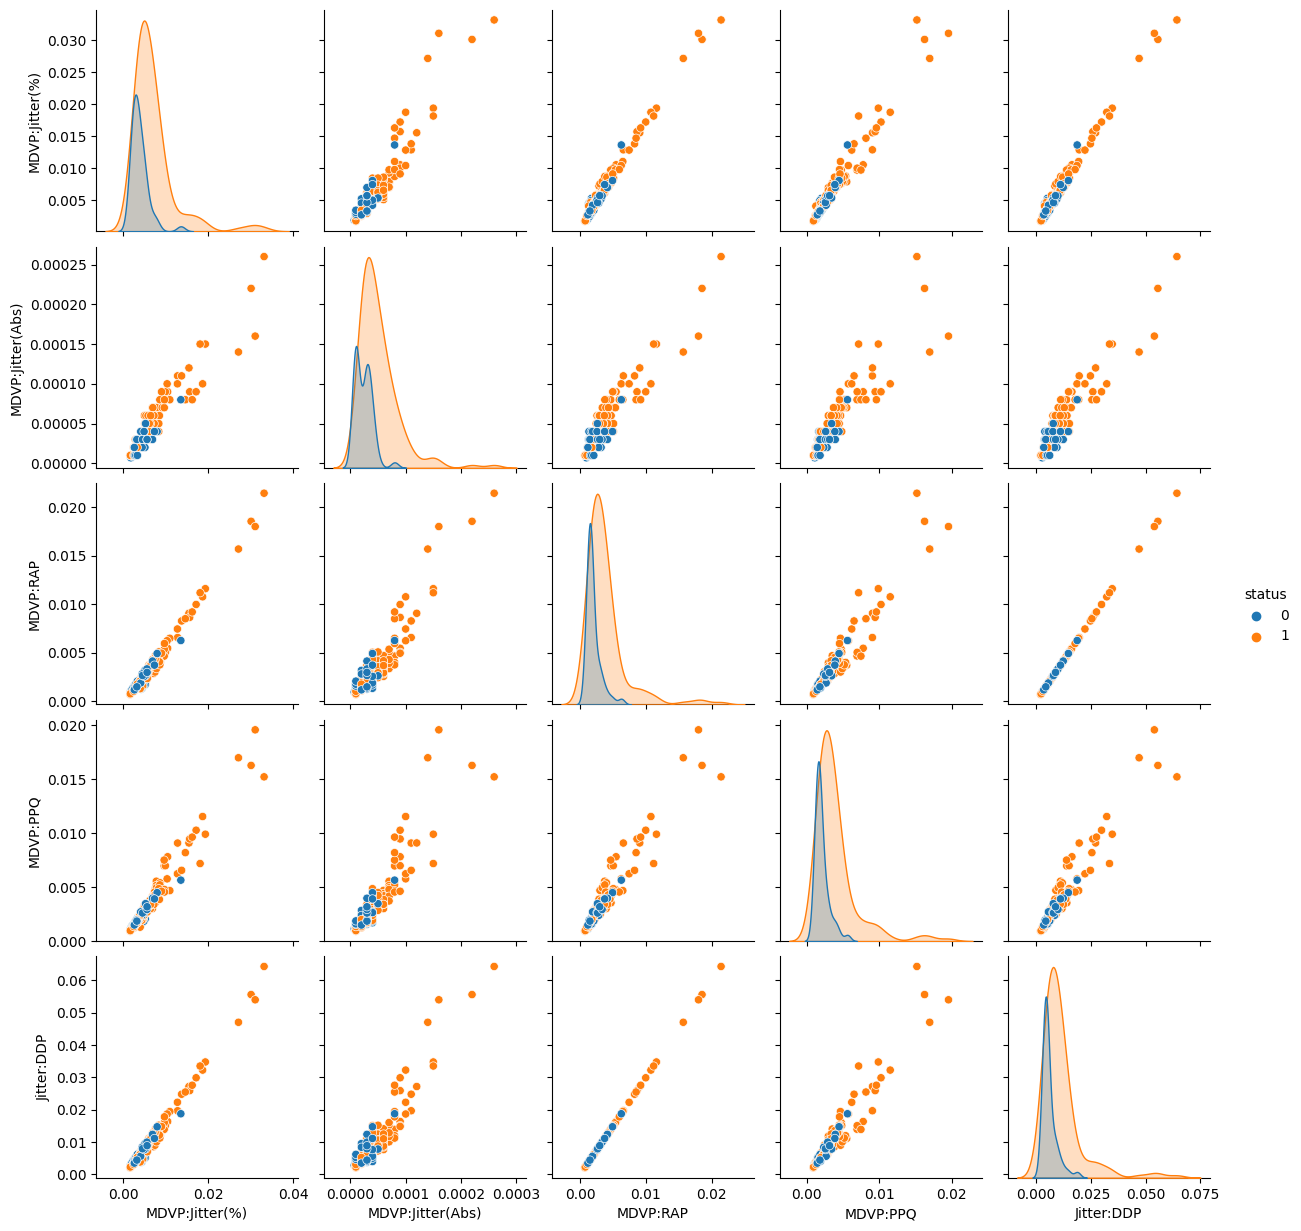

In [14]:
# Replace infinite values with NaN
parkinsons_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Ignore specific future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Set the default figure size
plt.rcParams['figure.figsize'] = (15, 4)

# Create the pairplot
sns.pairplot(parkinsons_data, hue='status', vars=['MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP'])

# Display the plot
plt.show()

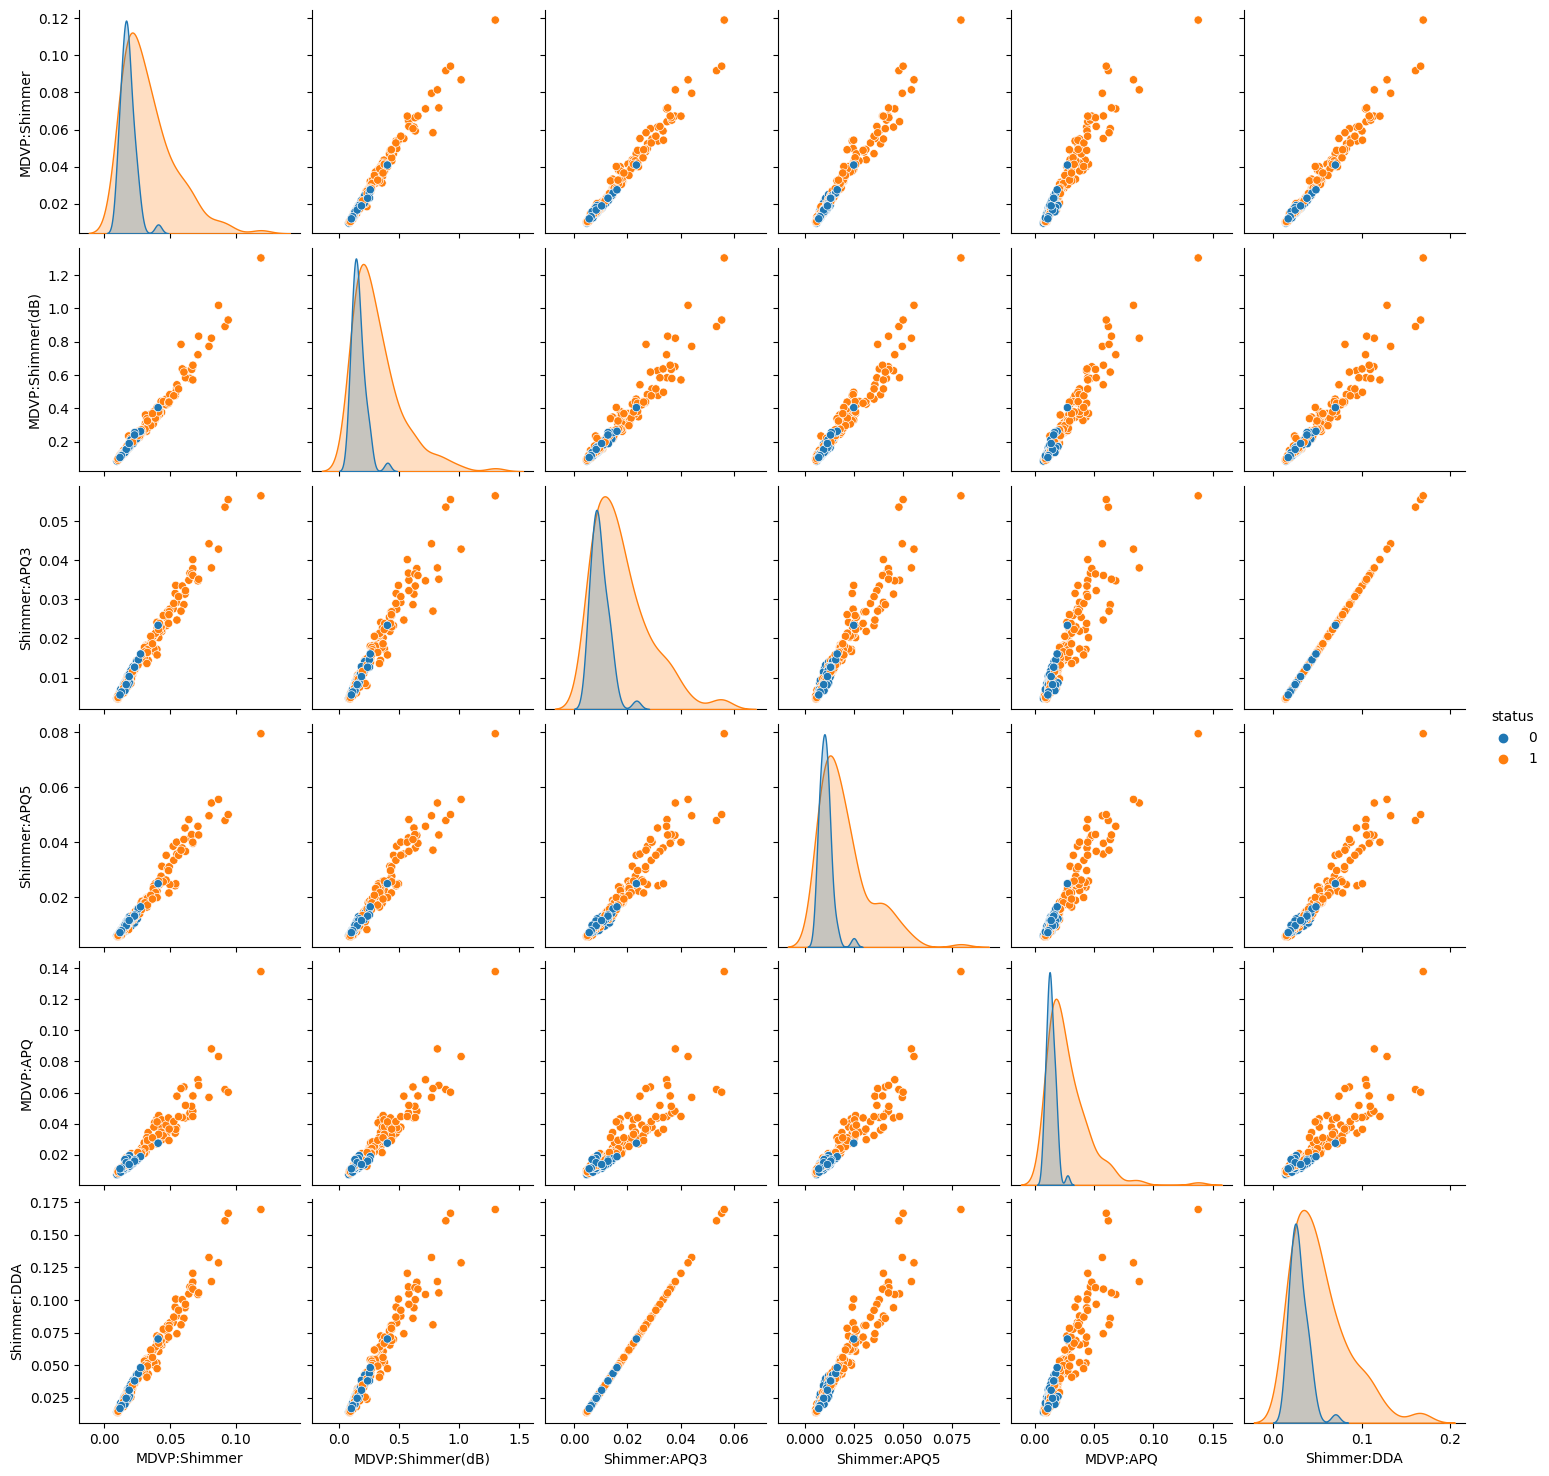

In [15]:
plt.rcParams['figure.figsize'] = (15, 4)
sns.pairplot(parkinsons_data,hue = 'status', vars = ['MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA'] )
plt.show()

Separating the features & Target

In [16]:
X = parkinsons_data.drop(columns=['name','status'], axis=1)
Y = parkinsons_data['status']

In [17]:
print(X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [18]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


Splitting the data to training data & Test data

In [19]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [20]:
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (156, 22) (39, 22)


Support vector machine model

In [21]:
# Create SVM model
model = svm.SVC(kernel='linear')  # You can also try 'rbf', 'poly', etc.

# Train the model
model.fit(X_train, Y_train)

# Make predictions
X_train_prediction = model.predict(X_train)
X_test_prediction = model.predict(X_test)

# Evaluate the accuracy on training data
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print(f"Training Data Accuracy: {training_data_accuracy * 100:.2f}%")

# Evaluate the accuracy on testing data
testing_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print(f"Testing Data Accuracy: {testing_data_accuracy * 100:.2f}%")



Training Data Accuracy: 87.18%
Testing Data Accuracy: 87.18%


Decision tree classifier


In [22]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree Classifier model
dt_model = DecisionTreeClassifier()

# Train the model
dt_model.fit(X_train, Y_train)

# Make predictions
X_train_prediction_dt = dt_model.predict(X_train)
X_test_prediction_dt = dt_model.predict(X_test)

# Evaluate the accuracy on training data
training_data_accuracy_dt = accuracy_score(Y_train, X_train_prediction_dt)
print(f"Decision Tree Training Data Accuracy: {training_data_accuracy_dt * 100:.2f}%")

# Evaluate the accuracy on testing data
testing_data_accuracy_dt = accuracy_score(Y_test, X_test_prediction_dt)
print(f"Decision Tree Testing Data Accuracy: {testing_data_accuracy_dt * 100:.2f}%")


Decision Tree Training Data Accuracy: 100.00%
Decision Tree Testing Data Accuracy: 74.36%


logistic regression


In [23]:
from sklearn.linear_model import LogisticRegression

# Create Logistic Regression model with increased max_iter
logistic_model = LogisticRegression(max_iter=2000)  # You can adjust this value as needed

# Train the model
logistic_model.fit(X_train, Y_train)

# Make predictions
X_train_prediction_lr = logistic_model.predict(X_train)
X_test_prediction_lr = logistic_model.predict(X_test)

# Evaluate the accuracy on training data
training_data_accuracy_lr = accuracy_score(Y_train, X_train_prediction_lr)
print(f"Logistic Regression Training Data Accuracy: {training_data_accuracy_lr * 100:.2f}%")

# Evaluate the accuracy on testing data
testing_data_accuracy_lr = accuracy_score(Y_test, X_test_prediction_lr)
print(f"Logistic Regression Testing Data Accuracy: {testing_data_accuracy_lr * 100:.2f}%")


Logistic Regression Training Data Accuracy: 87.82%
Logistic Regression Testing Data Accuracy: 87.18%


Random Forest classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create Random Forest Classifier model
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(X_train, Y_train)

# Make predictions
X_train_prediction_rf = rf_model.predict(X_train)
X_test_prediction_rf = rf_model.predict(X_test)

# Evaluate the accuracy on training data
training_data_accuracy_rf = accuracy_score(Y_train, X_train_prediction_rf)
print(f"Random Forest Training Data Accuracy: {training_data_accuracy_rf * 100:.2f}%")

# Evaluate the accuracy on testing data
testing_data_accuracy_rf = accuracy_score(Y_test, X_test_prediction_rf)
print(f"Random Forest Testing Data Accuracy: {testing_data_accuracy_rf * 100:.2f}%")


Random Forest Training Data Accuracy: 100.00%
Random Forest Testing Data Accuracy: 82.05%


Model Evaluation and comparison


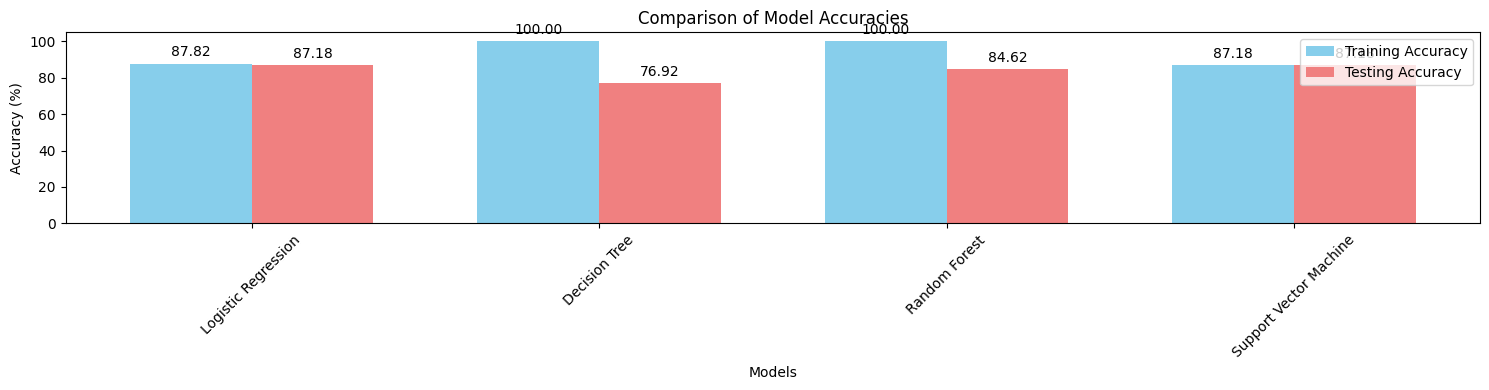

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Models and accuracies
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Support Vector Machine']
training_accuracies = [87.82, 100.0, 100.0, 87.18]
testing_accuracies = [87.18, 76.92, 84.62, 87.18]

# Plotting
x = np.arange(len(models))  # Label locations
width = 0.35  # Bar width

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, training_accuracies, width, label='Training Accuracy', color='skyblue')
bars2 = ax.bar(x + width/2, testing_accuracies, width, label='Testing Accuracy', color='lightcoral')

# Labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Comparison of Model Accuracies')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Display values on top of bars
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

autolabel(bars1)
autolabel(bars2)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
